# Linear Regression Model Development


# Setup

In [ ]:
!pip install python-dotenv google-api-python-client
!git clone https://github.com/vmagdale2/Data-Transformation-Linear-Regression.git

import sys
sys.path.append('/content/Data-Transformation-Linear-Regression/src')
%cd /content/Data-Transformation-Linear-Regression/src
!pwd
!ls

from utils import authenticate_and_load_env, load_data_from_drive
from google.colab import drive
drive.mount('/content/drive')

import os
env_content = """
"""
with open("/content/.env", "w") as f:
    f.write(env_content.strip())

from dotenv import load_dotenv
load_dotenv("/content/.env")

service = authenticate_and_load_env()

file_id = os.getenv("GDRIVE_FILE_ID")
if not file_id:
    raise ValueError("❌ Error: 'GDRIVE_FILE_ID' is missing or invalid in your .env file.")

data = load_data_from_drive(service, file_id)
print("✅ Data loaded successfully!" if data is not None else "❌ Failed to load data.")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

df = pd.read_csv('/content/drive/MyDrive/Professional/Portfolio/Transformations/training_data.csv')
df.head()

Cloning into 'Data-Transformation-Linear-Regression'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 47 (delta 21), reused 33 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 19.63 KiB | 6.54 MiB/s, done.
Resolving deltas: 100% (21/21), done.
/content/Data-Transformation-Linear-Regression/src
/content/Data-Transformation-Linear-Regression/src
data_preprocessing.py  evaluation.py  feature_engineering.py  model.py	utils.py
Mounted at /content/drive
✅ Google Drive API authenticated successfully!
✅ Data loaded successfully!


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
import os
import joblib

file_paths = {
    'X_train': '/content/drive/MyDrive/Professional/Portfolio/Transformations/X_train.pkl',
    'X_test': '/content/drive/MyDrive/Professional/Portfolio/Transformations/X_test.pkl',
    'y_train': '/content/drive/MyDrive/Professional/Portfolio/Transformations/y_train.pkl',
    'y_test': '/content/drive/MyDrive/Professional/Portfolio/Transformations/y_test.pkl'
}

loaded_data = {}

missing_files = []

for name, path in file_paths.items():
    if os.path.exists(path):
        loaded_data[name] = joblib.load(path)
        print(f"✅ {name} loaded successfully!")
    else:
        print(f"❌ {name}.pkl not found. Please check the file path or regenerate the data.")
        missing_files.append(name)

X_train = loaded_data.get('X_train')
X_test = loaded_data.get('X_test')
y_train = loaded_data.get('y_train')
y_test = loaded_data.get('y_test')

if missing_files:
    print("\n⚠️ The following files are missing: " + ", ".join(missing_files))
    print("🚨 Please regenerate missing files before proceeding.")
else:
    print("\n✅ All required data files loaded successfully!")


✅ X_train loaded successfully!
✅ X_test loaded successfully!
✅ y_train loaded successfully!
✅ y_test loaded successfully!

✅ All required data files loaded successfully!


# Training for Linear Regression Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model Evaluation Metrics

In [ ]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse:.4f} | R-squared: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f} | R-squared: {test_r2:.4f}")

Training MSE: 0.2009 | R-squared: 0.8042
Testing MSE: 0.1945 | R-squared: 0.7887


### Notes
The model seems to explain a significant portion of the variance. Shows signs of robustness.

In [ ]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R-squared scores: {cv_scores}")
print(f"Average CV R-squared: {np.mean(cv_scores):.4f}")

Cross-Validation R-squared scores: [0.77514519 0.75775941 0.85471857 0.80478775 0.63707461]
Average CV R-squared: 0.7659


### Notes
Fold 5 is noticeably lower (0.6371). This suggests that the model may struggle with certain data distributions or segments of your dataset.
This could indicate:
Potential outliers in that fold.
Feature imbalances or data that was not scaled optimally.
### Possible Next Steps
-✅ Investigate the Fold with the Lower Score:

Consider analyzing that data fold for unusual patterns, outliers, or data quality issues.

-✅ Try Hyperparameter Tuning:

Cross-validation pairs well with techniques like GridSearchCV or RandomizedSearchCV to improve model performance.

-✅ Consider Feature Engineering or Transformation:

Since you've already transformed outliers and scaled features, exploring feature selection or adding interaction terms may further improve performance.

# Investigating fold 4

In [ ]:
import joblib
import pandas as pd

X_train.to_pickle('/content/drive/MyDrive/Professional/Portfolio/Transformations/y_train.pkl')
print("✅ y_train.pkl successfully saved.")


✅ y_train.pkl successfully saved.


In [ ]:
import pandas as pd

X_train = pd.read_pickle('/content/drive/MyDrive/Professional/Portfolio/Transformations/y_train.pkl')
print("✅ Successfully loaded the regenerated y_train.pkl file!")


✅ Successfully loaded the regenerated y_train.pkl file!


In [ ]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np

X = pd.read_pickle('/content/drive/MyDrive/Professional/Portfolio/Transformations/X_train.pkl')
y = pd.read_pickle('/content/drive/MyDrive/Professional/Portfolio/Transformations/y_train.pkl')

kf = KFold(n_splits=5, shuffle=True, random_state=42)

lowest_score_fold = 4
fold_index = 0

for train_idx, test_idx in kf.split(X):
    if fold_index == lowest_score_fold:
        X_low_score = X.iloc[test_idx]
        y_low_score = y.iloc[test_idx]
        break
    fold_index += 1

print(f"✅ Isolated fold {lowest_score_fold} with {X_low_score.shape[0]} records.")


✅ Isolated fold 4 with 70 records.


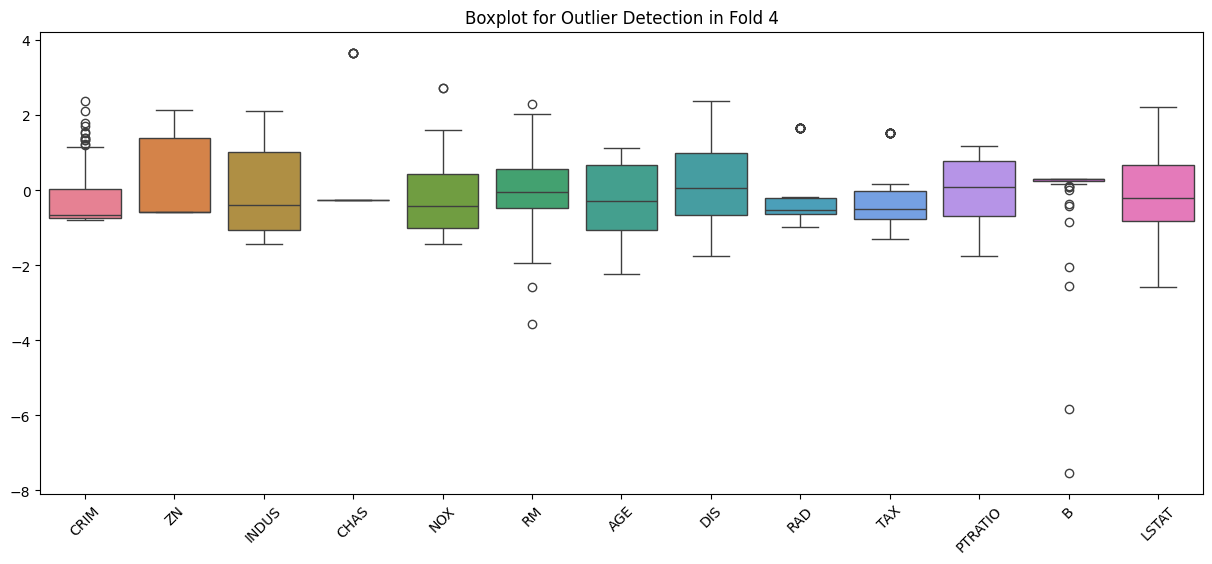

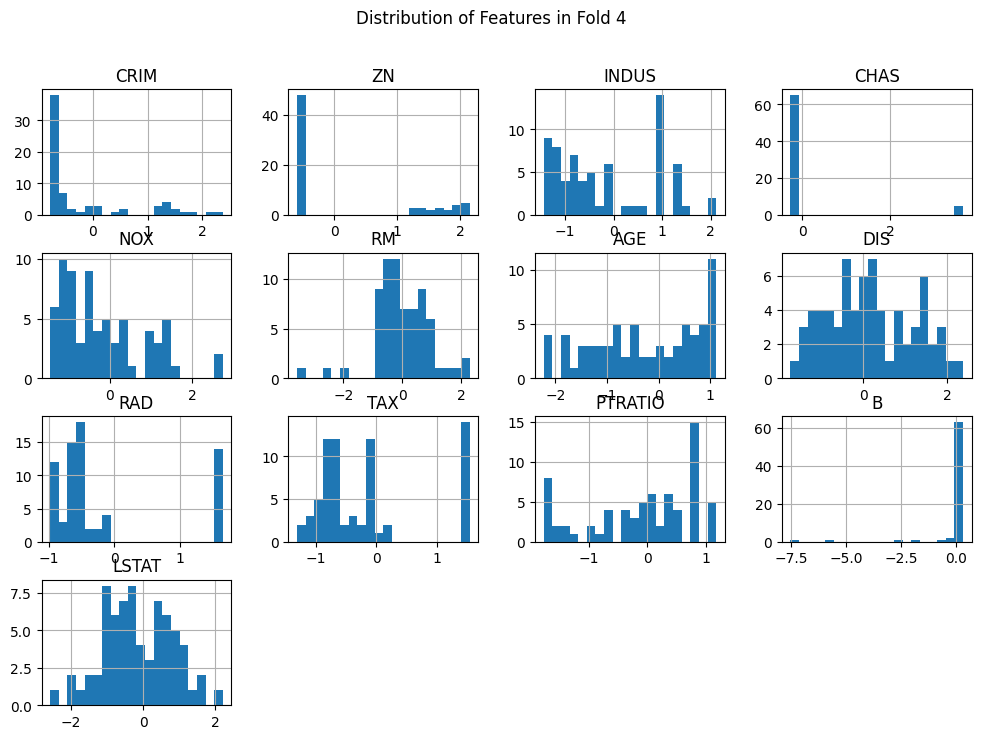

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.boxplot(data=X_low_score)
plt.xticks(rotation=45)
plt.title(f"Boxplot for Outlier Detection in Fold {lowest_score_fold}")
plt.show()

X_low_score.hist(figsize=(12, 8), bins=20)
plt.suptitle(f"Distribution of Features in Fold {lowest_score_fold}")
plt.show()


# Visual Forecast

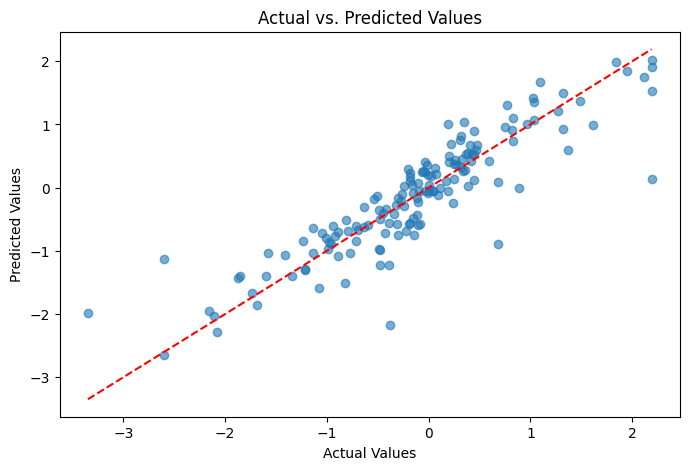

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

### Key Insights
- The model achieved an R-squared value of **0.80** on the training set and **0.79** on the test set.
- The model shows strong predictive performance with minimal overfitting (as indicated by consistent R-squared values between training and testing).

### Recommended Next Steps
- Conduct feature engineering to enhance model performance
- Explore regularization techniques such as Ridge or Lasso for improved generalization